## Libraries

In [14]:
import os
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import urllib
import json
import re
import matplotlib
import matplotlib.pyplot as plt

### Loading CSV file:

In [2]:
#os.chdir("C:/Users/ori/Desktop/txt_for_python/data")

data_file="df_5.csv"
data=pd.read_csv(data_file)
print(data)

         city       country                                        Description
0     Antalya        Turkey  Once seen simply as the gateway to the Turkish...
1      Athens        Greece  With equal measures of grunge and grace, Athen...
2   Ayia-napa        Cyprus  Endless blue-sky days and a coastline riddled ...
3     Bangkok      Thailand  Same same, but different. This Thailish T-shir...
4   Barcelona         Spain  Barcelona is an enchanting seaside city with b...
..        ...           ...                                                ...
71     Venice         Italy  Imagine the audacity of building a city of mar...
72     Vienna       Austria  Baroque streetscapes and imperial palaces set ...
73     Warsaw        Poland  A phoenix arisen from the ashes, Poland's capi...
74  Zakynthos        Greece  Zakynthos, also known by its Italian name Zant...
75     Zurich   Switzerland  Culturally vibrant, efficiently run and attrac...

[76 rows x 3 columns]


## QUESTION 1:

In [4]:
data["num_of_words"] = data["Description"].apply(lambda x: len(str(x).split(" ")))
print(data)
#df["WANTED_COLUMN"].apply(lambda x: len(str(x).split(' ')))

         city       country  \
0     Antalya        Turkey   
1      Athens        Greece   
2   Ayia-napa        Cyprus   
3     Bangkok      Thailand   
4   Barcelona         Spain   
..        ...           ...   
71     Venice         Italy   
72     Vienna       Austria   
73     Warsaw        Poland   
74  Zakynthos        Greece   
75     Zurich   Switzerland   

                                          Description  num_of_words  
0   Once seen simply as the gateway to the Turkish...           112  
1   With equal measures of grunge and grace, Athen...           393  
2   Endless blue-sky days and a coastline riddled ...           147  
3   Same same, but different. This Thailish T-shir...           390  
4   Barcelona is an enchanting seaside city with b...           419  
..                                                ...           ...  
71  Imagine the audacity of building a city of mar...           412  
72  Baroque streetscapes and imperial palaces set ...           410

## QUESTION 2:

In [5]:
data["No_punct_description"] = data["Description"].apply(lambda x: str(x).replace(".", ""))
data["No_punct_description"]=data["No_punct_description"].apply(lambda x: str(x).replace(",", ""))
data["No_punct_description"]=data["No_punct_description"].apply(lambda x: str(x).replace(" - ", ""))
data["No_punct_description"]=data["No_punct_description"].apply(lambda x: str(x).replace("(", ""))
data["No_punct_description"]=data["No_punct_description"].apply(lambda x: str(x).replace(";", ""))
data["No_punct_description"]=data["No_punct_description"].apply(lambda x: str(x).replace(")", ""))
data["No_punct_description"]=data["No_punct_description"].apply(lambda x: str(x).replace("'", ""))
data["No_punct_description"]=data["No_punct_description"].apply(lambda x: str(x).replace("–", ""))
data["No_punct_description"]=data["No_punct_description"].apply(lambda x: str(x).replace(":", ""))
data["No_punct_description"]=data["No_punct_description"].apply(lambda x: str(x).replace("...", ""))
data["No_punct_description"]=data["No_punct_description"].apply(lambda x: str(x).replace("!", ""))
data["No_punct_description"]=data["No_punct_description"].apply(lambda x: str(x).replace("?", ""))
data["No_punct_description"]=data["No_punct_description"].apply(lambda x: str(x).replace("&", ""))

print(data["No_punct_description"].iloc[5])

Historically Basels position astride the mighty Rhine has contributed to its growth as a key trade and transport hub Today its a global centre for the pharmaceutical industry  titans Roche and Novartis are both headquartered here But thats of little interest to the many thousands of art and architecture lovers who visit each year for the world-famous ART Basel festival and the citys wealth of galleries museums and iconic buildingsBasels position at the juncture of the French German and Swiss borders adds to its multicultural appeal and its perhaps the place where Switzerlands Franco-Germanic roots are most evident although the dominant language spoken is Swiss-GermanIts easy to spend a day wandering the cobbled streets of the lofty and beautiful Altstadt in Grossbasel Greater Basel on the Rhines south bank before crossing the Mittlere Brücke to Kleinbasel Little Basel for a more everyday vibe and riverside alfresco dining


## QUESTION 3:


In [6]:
data["has_restaurants"] = data["Description"].apply(lambda x: str(x).count("restaurant"))
print(data)

         city       country  \
0     Antalya        Turkey   
1      Athens        Greece   
2   Ayia-napa        Cyprus   
3     Bangkok      Thailand   
4   Barcelona         Spain   
..        ...           ...   
71     Venice         Italy   
72     Vienna       Austria   
73     Warsaw        Poland   
74  Zakynthos        Greece   
75     Zurich   Switzerland   

                                          Description  num_of_words  \
0   Once seen simply as the gateway to the Turkish...           112   
1   With equal measures of grunge and grace, Athen...           393   
2   Endless blue-sky days and a coastline riddled ...           147   
3   Same same, but different. This Thailish T-shir...           390   
4   Barcelona is an enchanting seaside city with b...           419   
..                                                ...           ...   
71  Imagine the audacity of building a city of mar...           412   
72  Baroque streetscapes and imperial palaces set ...      

## QUESTION 4:

In [7]:
data["has_museums"] = data["Description"].apply(lambda x: str(x).count("museums"))
print(data)

         city       country  \
0     Antalya        Turkey   
1      Athens        Greece   
2   Ayia-napa        Cyprus   
3     Bangkok      Thailand   
4   Barcelona         Spain   
..        ...           ...   
71     Venice         Italy   
72     Vienna       Austria   
73     Warsaw        Poland   
74  Zakynthos        Greece   
75     Zurich   Switzerland   

                                          Description  num_of_words  \
0   Once seen simply as the gateway to the Turkish...           112   
1   With equal measures of grunge and grace, Athen...           393   
2   Endless blue-sky days and a coastline riddled ...           147   
3   Same same, but different. This Thailish T-shir...           390   
4   Barcelona is an enchanting seaside city with b...           419   
..                                                ...           ...   
71  Imagine the audacity of building a city of mar...           412   
72  Baroque streetscapes and imperial palaces set ...      

## QUESTION 5:

In [8]:
data["has_beaches"] = data["Description"].apply(lambda x: str(x).count(" beach " or " ocean " or " sea "))
print(data)

         city       country  \
0     Antalya        Turkey   
1      Athens        Greece   
2   Ayia-napa        Cyprus   
3     Bangkok      Thailand   
4   Barcelona         Spain   
..        ...           ...   
71     Venice         Italy   
72     Vienna       Austria   
73     Warsaw        Poland   
74  Zakynthos        Greece   
75     Zurich   Switzerland   

                                          Description  num_of_words  \
0   Once seen simply as the gateway to the Turkish...           112   
1   With equal measures of grunge and grace, Athen...           393   
2   Endless blue-sky days and a coastline riddled ...           147   
3   Same same, but different. This Thailish T-shir...           390   
4   Barcelona is an enchanting seaside city with b...           419   
..                                                ...           ...   
71  Imagine the audacity of building a city of mar...           412   
72  Baroque streetscapes and imperial palaces set ...      

## QUESTION 6:

In [9]:
print(data["Description"].apply(lambda x: len(str(x).split(" "))).mean())


272.5131578947368


## QUESTION 7:

In [13]:
print(data["city"].iloc[np.where(data["num_of_words"]==data["num_of_words"].max())])

28    Florence
Name: city, dtype: object


## QUESTION 8:

(array([22., 16.,  0.,  0.,  1.,  0.,  5., 31.,  0.,  1.]),
 array([103. , 144.2, 185.4, 226.6, 267.8, 309. , 350.2, 391.4, 432.6,
        473.8, 515. ]),
 <a list of 10 Patch objects>)

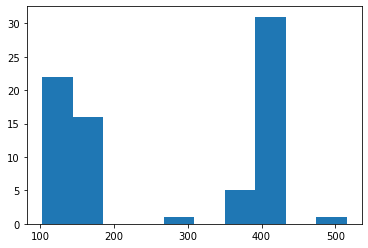

In [20]:
plt.hist(data["num_of_words"])

#x= data["city"]
#y= data["num_of_words"]
#plt.bar(x,y)
#plt.show()

## QUESTION 9:

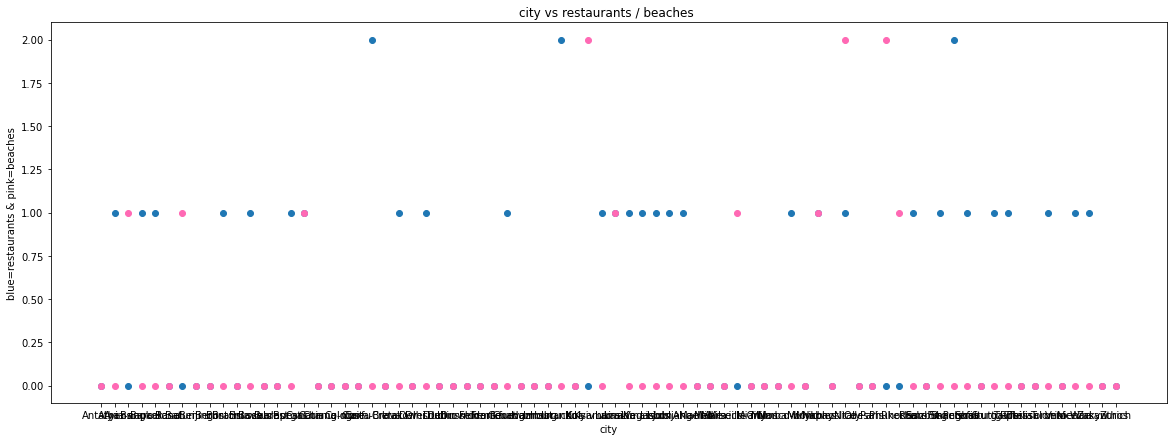

In [56]:
x= data["city"]
y= data["has_restaurants"]

plt.scatter(x, y)

y=data["has_beaches"]
plt.scatter(x, y,color = 'hotpink')
plt.xlabel("city")
plt.ylabel("blue=restaurants & pink=beaches")
plt.title("city vs restaurants / beaches ")
plt.rcParams["figure.figsize"] = (30,7)
plt.show()

## QUESTION 10:

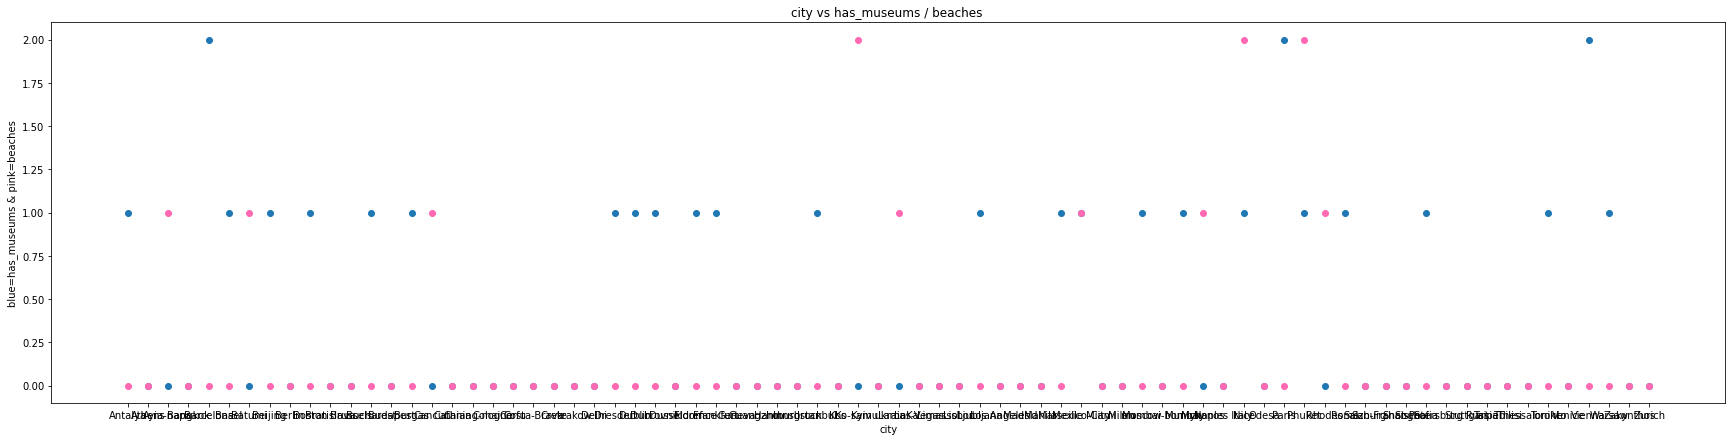

In [57]:
x= data["city"]
y= data["has_museums"]

plt.scatter(x, y)

y=data["has_beaches"]
plt.scatter(x, y,color = 'hotpink')
plt.xlabel("city")
plt.ylabel("blue=has_museums & pink=beaches")
plt.title("city vs has_museums / beaches ")
plt.rcParams["figure.figsize"] = (30,7)
plt.show()